In [65]:
pip install sklearn

In [66]:
import pymongo
import csv

# Coneccion a MongoDB
#client = pymongo.MongoClient("mongodb://localhost:27017/")
client = pymongo.MongoClient("localhost:27017")
# Acceso a la base de datos
db = client["Covid-19"]

# Creando la coleccion
collection = db['Covid-19']

# Tomar datos del archivo csv
datos = csv.DictReader(open('CCCba.csv'))

# subir los datos a Mongo
for fila in datos:
    collection.insert_one(fila)

In [67]:
print(collection.count())

1452


<ipython-input-67-0046f8684a48>:1: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  print(collection.count())


In [68]:
import sklearn

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
processDf = pd.read_csv('CCCba.csv')
processDf.head(484)


,Fecha,Casos registrados Ciudad de Córdoba (acumulado),Casos registrados Provincia de Córdoba (acumulado),Fallecidos Provincia de Córdoba (acumulado),Nuevos casos registrados Ciudad de Córdoba,Nuevos casos registrados Provincia de Córdoba
0,25/3/2020,21,49,0,NaN,NaN
1,26/3/2020,22,52,0,1,3
2,28/3/2020,24,56,0,2,4
3,29/3/2020,30,73,0,6,17
4,30/3/2020,30,80,0,0,7
...,...,...,...,...,...,...
479,18/7/2021,199482,445141,5862,137,456
480,19/7/2021,199720,446235,5893,238,1064
481,20/7/2021,200028,447580,5927,308,1307
482,21/7/2021,200867,449515,5953,839,1908


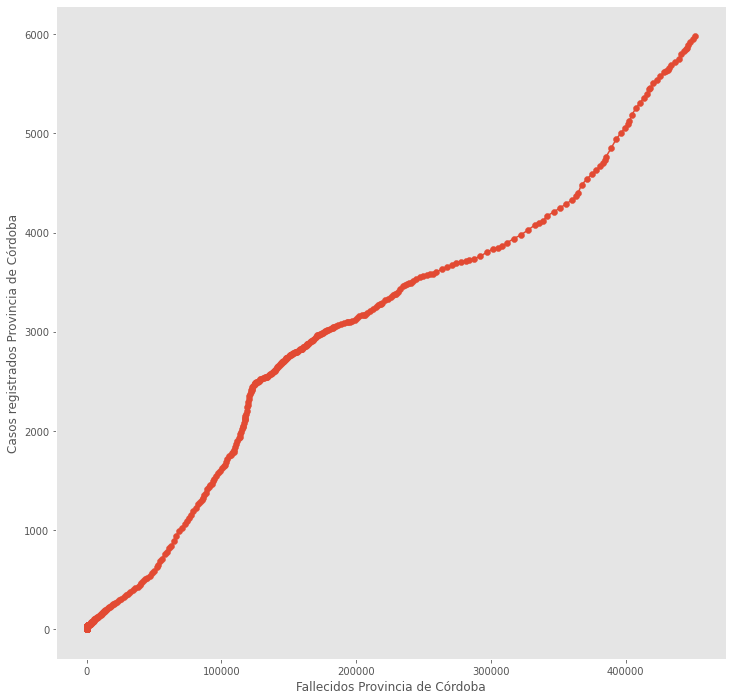

In [78]:
fig = plt.figure(figsize=(12,12))
#plt.scatter(x,y,label='Fecha', color='blue')
plt.scatter(processDf['Casos registrados Provincia de Córdoba (acumulado)'],processDf['Fallecidos Provincia de Córdoba (acumulado)'])
plt.plot(processDf['Casos registrados Provincia de Córdoba (acumulado)'],processDf['Fallecidos Provincia de Córdoba (acumulado)'])
plt.xlabel('Fallecidos Provincia de Córdoba')
plt.ylabel('Casos registrados Provincia de Córdoba')
plt.grid()

In [13]:
Df.keys()


Index(['Fecha', 'Casos registrados Ciudad de Córdoba (acumulado)',
       'Casos registrados Provincia de Córdoba (acumulado)',
       'Fallecidos Provincia de Córdoba (acumulado)',
       'Nuevos casos registrados Ciudad de Córdoba',
       'Nuevos casos registrados Provincia de Córdoba'],
      dtype='object')

In [75]:
Fallecidos = processDf['Fallecidos Provincia de Córdoba (acumulado)'].values.reshape(-1,1)
Casos = processDf['Casos registrados Provincia de Córdoba (acumulado)'].values.reshape(-1,1)
linear_regressor = LinearRegression()
linear_regressor.fit(Fallecidos, Casos)
Casos_pred = linear_regressor.predict(Fallecidos)
Casos_pred

array([[-1.08431090e+04],
       [-1.08431090e+04],
       [-1.08431090e+04],
       [-1.08431090e+04],
       [-1.08431090e+04],
       [-1.07710286e+04],
       [-1.07710286e+04],
       [-1.07710286e+04],
       [-1.07710286e+04],
       [-1.07710286e+04],
       [-1.06989482e+04],
       [-1.06989482e+04],
       [-1.06989482e+04],
       [-1.06989482e+04],
       [-1.06989482e+04],
       [-1.06989482e+04],
       [-1.06989482e+04],
       [-1.06268677e+04],
       [-1.05547873e+04],
       [-1.04827069e+04],
       [-1.04106265e+04],
       [-1.04106265e+04],
       [-1.04106265e+04],
       [-1.04106265e+04],
       [-1.03385461e+04],
       [-1.01943853e+04],
       [-1.01943853e+04],
       [-1.01223049e+04],
       [-1.01223049e+04],
       [-1.00502245e+04],
       [-9.97814408e+03],
       [-9.97814408e+03],
       [-9.90606367e+03],
       [-9.83398326e+03],
       [-9.83398326e+03],
       [-9.83398326e+03],
       [-9.83398326e+03],
       [-9.68982244e+03],
       [-9.5

In [77]:
m = linear_regressor.coef_[0][0]
c = linear_regressor.intercept_[0]
label = r'=== Dias = %0.3f  === Casos registrados Ciudad de Córdoba (acumulado) %+0.3f'%(m,c)
print(label)


=== Dias = 72.080  === Casos registrados Ciudad de Córdoba (acumulado) -10843.109


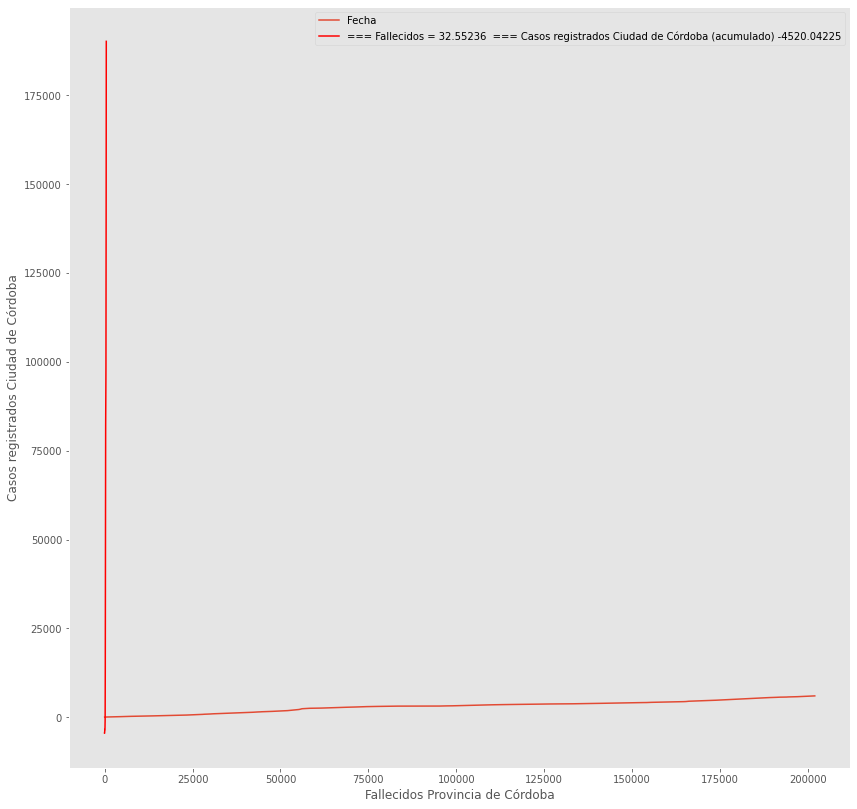

In [42]:
fig = plt.figure(figsize=(14,14))

plt.plot(processDf['Casos registrados Provincia de Córdoba (acumulado)'],processDf['Fallecidos Provincia de Córdoba (acumulado)'], label='Fecha')
plt.plot( processDf[Casos registrados Provincia de Córdoba]Casos_pred, color='red', label=label)
plt.xlabel('Fallecidos Provincia de Córdoba')
plt.ylabel('Casos registrados Ciudad de Córdoba')
plt.legend()
plt.grid()

In [18]:
pip install seaborn


In [55]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
#cargamos los datos de entrada
data = pd.read_csv("CCCba.csv")
#veamos cuantas dimensiones y registros contiene
data.shape

(484, 6)

In [57]:
#son 484 registros con 6 columnas. Veamos los primeros registros
data.head(483)

,Fecha,Casos registrados Ciudad de Córdoba (acumulado),Casos registrados Provincia de Córdoba (acumulado),Fallecidos Provincia de Córdoba (acumulado),Nuevos casos registrados Ciudad de Córdoba,Nuevos casos registrados Provincia de Córdoba
0,25/3/2020,21,49,0,NaN,NaN
1,26/3/2020,22,52,0,1,3
2,28/3/2020,24,56,0,2,4
3,29/3/2020,30,73,0,6,17
4,30/3/2020,30,80,0,0,7
...,...,...,...,...,...,...
478,17/7/2021,199345,444668,5857,622,1266
479,18/7/2021,199482,445141,5862,137,456
480,19/7/2021,199720,446235,5893,238,1064
481,20/7/2021,200028,447580,5927,308,1307


In [58]:
# Ahora veamos algunas estadísticas de nuestros datos
data.describe()

,Casos registrados Ciudad de Córdoba (acumulado),Casos registrados Provincia de Córdoba (acumulado),Fallecidos Provincia de Córdoba (acumulado)
count,484.000000,484.000000,484.000000
mean,54543.863636,119941.578512,1814.427686
std,57098.279392,126383.565299,1718.162758
min,21.000000,49.000000,0.000000
25%,795.000000,1669.500000,43.000000
50%,51724.500000,109389.500000,1796.500000
75%,75624.500000,173787.250000,2982.500000
max,201937.000000,451732.000000,5982.000000


<ipython-input-54-7d0d94ec548e>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data.drop(['Casos registrados Ciudad de Córdoba (acumulado)','Fallecidos Provincia de Córdoba (acumulado)'],1).hist()


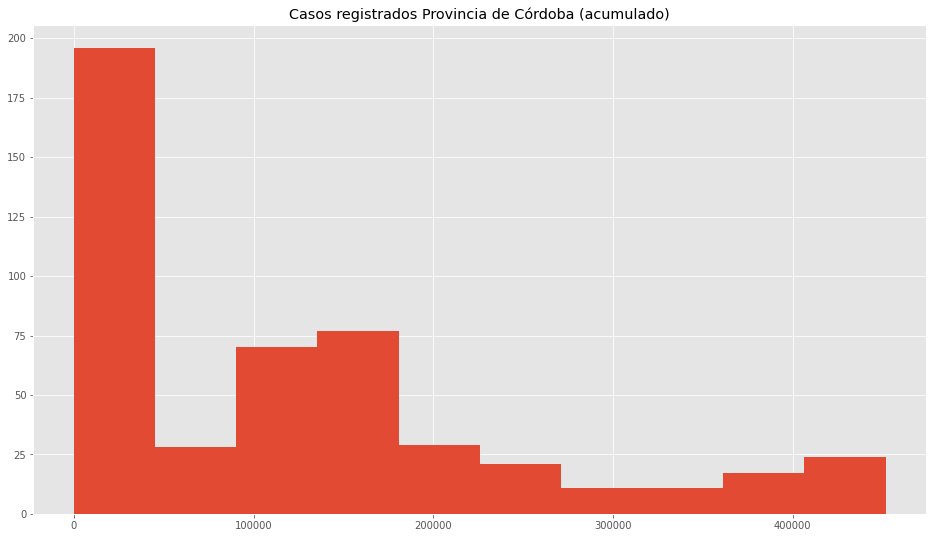

In [54]:
# Visualizamos rápidamente las caraterísticas de entrada

data.drop(['Casos registrados Ciudad de Córdoba (acumulado)','Fallecidos Provincia de Córdoba (acumulado)'],1).hist()
plt.show()

In [51]:
# Vamos a RECORTAR los datos en la zona donde se concentran más los puntos
# esto es en el eje X: entre 0 y 3.500
# y en el eje Y: entre 0 y 80.000
filtered_data = data[(data['Casos registrados Ciudad de Córdoba '] <= 3500) & (data['#Fallecidos'] <= 80000)]
 
colores=['orange','blue']
tamanios=[30,60]
 
f1 = filtered_data['Casos registrados Ciudad de Córdoba '].values
f2 = filtered_data['#Fallecidos'].values
 
# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['Casos registrados Ciudad de Córdoba ']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

KeyError: 'Casos registrados Ciudad de Córdoba '

In [25]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =filtered_data[["Casos registrados Ciudad de Córdoba (acumulado)"]]
X_train = np.array(dataX)
y_train = filtered_data['# Fallecidos Provincia de Córdoba (acumulado)'].values
 
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

NameError: name 'filtered_data' is not defined

In [26]:
#Vamos a intentar mejorar el Modelo, con una dimensión más: 
# Para poder graficar en 3D, haremos una variable nueva que será la suma de los enlaces, comentarios e imágenes
suma = (filtered_data["# of Links"] + filtered_data['# of comments'].fillna(0) + filtered_data['# Images video'])

dataX2 =  pd.DataFrame()
dataX2["Word count"] = filtered_data["Word count"]
dataX2["suma"] = suma
XY_train = np.array(dataX2)
z_train = filtered_data['# Shares'].values

NameError: name 'filtered_data' is not defined

In [59]:
# Creamos un nuevo objeto de Regresión Lineal
regr2 = linear_model.LinearRegression()

# Entrenamos el modelo, esta vez, con 2 dimensiones
# obtendremos 2 coeficientes, para graficar un plano
regr2.fit(XY_train, z_train)

# Hacemos la predicción con la que tendremos puntos sobre el plano hallado
z_pred = regr2.predict(XY_train)

# Los coeficientes
print('Coefficients: \n', regr2.coef_)
# Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.2f' % r2_score(z_train, z_pred))

NameError: name 'XY_train' is not defined

In [29]:
pip install Axes3D

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement Axes3D (from versions: none)
ERROR: No matching distribution found for Axes3D


<ipython-input-30-3b1bbec270b2>:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


AttributeError: 'LinearRegression' object has no attribute 'coef_'

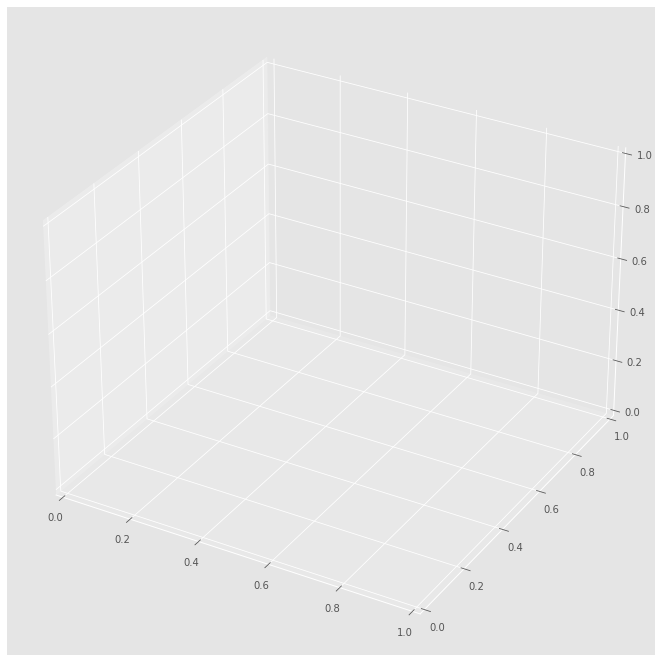

In [30]:
fig = plt.figure()
ax = Axes3D(fig)

# Creamos una malla, sobre la cual graficaremos el plano
xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 60, num=10))

# calculamos los valores del plano para los puntos x e y
nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy) 

# calculamos los correspondientes valores para z. Debemos sumar el punto de intercepción
z = (nuevoX + nuevoY + regr2.intercept_)

# Graficamos el plano
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')

# Graficamos en azul los puntos en 3D
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue',s=30)

# Graficamos en rojo, los puntos que 
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red',s=40)

# con esto situamos la "camara" con la que visualizamos
ax.view_init(elev=30., azim=65)
        
ax.set_xlabel('Cantidad de Palabras')
ax.set_ylabel('Cantidad de Enlaces,Comentarios e Imagenes')
ax.set_zlabel('Compartido en Redes')
ax.set_title('Regresión Lineal con Múltiples Variables')

In [28]:
def agregar_empleado():
        #conexion()
        import pymysql
        conn = pymysql.connect(
        host='127.0.0.1', user='root',
        passwd='', db='employees')
        cursor = conn.cursor()
        nro_em=int(input("Ingresa el número del nuevo empleado: "))
        b_day=input("Ingresa la fecha de nacimiento formato aaaa/mm/dd: ")
        nombre=input("Ingrese en nombre: ")
        apellido=input("Ingrese el apellido: ")
        genero=input("Ingrese el genero M / F: ")
        f_alta=input("Ingrese la fecha de ingreso a la empresa, formato aaaa/mm/dd: ")
        sqlinsertar=" INSERT INTO `employees` (emp_no, birth_date,first_name, last_name,gender, hire_date) VALUES (%s,%s, %s, %s, %s, %s ) "
        datos=(nro_em,b_day,nombre,apellido,genero,f_alta)
        cursor.execute(sqlinsertar,datos)
        conn.commit()   # con commit se guardan los valores en la tabla
        conn.close()
        
def modificar_empleado():
        #conexion()
        import pymysql
        conn = pymysql.connect(
        host='127.0.0.1', user='root',
        passwd='', db='employees')
        cursor = conn.cursor()
        nro_em=int(input("Ingrese el nro de empleado que desea modificar: "))
        gen=input("Ingrese el género actual: ")        
        sqlupd=" UPDATE `employees` SET gender=%s WHERE emp_no=%s "   #actualizo un dato del registro de empleado nro 10005
        d=(gen, nro_em)
        cursor.execute(sqlupd, d)
        conn.commit()
        conn.close()
def eliminar_empleado():
        #conexion()
        import pymysql
        conn = pymysql.connect(
        host='127.0.0.1', user='root',
        passwd='', db='employees')
        cursor = conn.cursor()
        nro_em=int(input("Ingrese el nro de empleado que desea eliminar: "))
        sqleli=" DELETE  FROM `employees` WHERE emp_no= %s"    #elimino de la BD el registro cuyo emp_no=5
        cursor.execute(sqleli, nro_em)
        conn.commit()
        conn.close()
        